In [10]:
import qiskit
qiskit.__version__

%load_ext dotenv
%dotenv

# The SWAP test

> We use a free quantum simulator provided by BlueQubit in order to run our quantum circuits. This is free up to 34 qubits. This is similar to IBM's Aer simulator, which essentially uses multiple classical processors in parallel to emulate quantum hardware with the help of some maths.

A key thing about any two qubits is the fact that given a state $\ket{\psi}$, we can find the probability of it being related to another state $\ket{\chi}$ by simply finding the norm of its inner product, i.e. $|\langle \psi | \chi \rangle|^2$. It can be from completely unrelated (orthogonal, aka $\ket{0}$) to exactly the same (identical, aka $\ket{1}$).

This is where we get the SWAP test. We take an ancillary (THIS MEANS CONTROL) qubit and two states. The first Hadamard gate puts the control qubit into superposition. The CSWAP swaps the two states when the control qubit is $|1\rangle$. The final Hadamard gate brings them back into the basis ($e$). We get the following:

$$ \text{Final state} = \frac{1}{2}\ket{0}(| \psi | \chi \rangle + | \chi | \psi \rangle) + \frac{1}{2}\ket{1}(| \psi | \chi \rangle - | \chi | \psi \rangle) $$

If we now measure the probability of the control qubit being $|0\rangle$, we get:

$$ P(q_1 = 0) = ||\frac{1}{2}(| \psi | \chi \rangle + | \chi | \psi \rangle) ||^2
              = \frac{1}{2} + \frac{1}{2}|\langle \psi | \chi \rangle|^2 $$

> How do we get the inner product here?
> $$ P(q_1 = 0) = \frac{1}{4}[\langle \psi , \chi | \psi , \chi \rangle + \langle \psi , \chi | \chi , \psi \rangle + \langle \chi , \psi | \psi , \chi \rangle + \langle \chi , \psi | \chi , \psi \rangle] \\ = \frac{1}{4}[1 + 2|\langle \psi | \chi \rangle|^2 + 1]$$

Thus we get the inner product as:

$$ |\langle \psi | \chi \rangle|^2 = 2P(q_1 = 0) - 1 $$

Hence we can repeat this test multiple times to get a good estimate of the inner product between two states.

In [11]:
# imports block
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import bluequbit
import os

In [5]:
quantum_registers = QuantumRegister(3, 'input_q')
classic_registers = ClassicalRegister(1, 'output_b')
swap_circuit = QuantumCircuit(quantum_registers, classic_registers)

In [6]:
swap_circuit.h(quantum_registers[0]) # We add a Hadamard gate to the first qubit
swap_circuit.x(quantum_registers[1]) # We add a NOT gate to the second qubit to flip it to |1>

Now we have the following:

$$ \ket{q_1} = \frac{1}{\sqrt{2}} \left( \ket{0} + \ket{1} \right), \ket{q_2} = \ket{1}, \ket{q_3} = \ket{0} $$


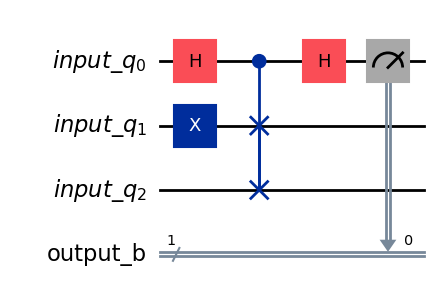

In [7]:
swap_circuit.cswap(quantum_registers[0], quantum_registers[1], quantum_registers[2])
swap_circuit.h(quantum_registers[0]) # We add another Hadamard gate to the first qubit
swap_circuit.measure(quantum_registers[0], classic_registers[0]) # We finally pop the result into the classical bit
swap_circuit.draw('mpl')

In [12]:
SHOTS = 100

backend = bluequbit.init(os.getenv('BLUE_QUBIT_KEY'))
result = backend.run(swap_circuit, shots=SHOTS)
counts = result.get_counts()

[BQ-PYTHON-SDK][WARNING] - Beta version 0.18.0b1 of BlueQubit Python SDK is being used.


[BQ-PYTHON-SDK][INFO] - Submitted: Job ID: cNbHDG9NlYAYuHCj, device: cpu, run status: PENDING, created on: 2025-11-01 20:00:00 UTC, estimated runtime: 100 ms, estimated cost: $0.00, num qubits: 3, shots: 100
[BQ-PYTHON-SDK][INFO] - Status changed: Job ID: cNbHDG9NlYAYuHCj. From PENDING to RUNNING.


Here we get a result of counts. Since we flipped the states, we expect that the inner product is 0. With a very tiny number of shots, we get a decently favourable result. If we removed the NOT gate, we would get an inner product of 1 instead.

In [13]:
2 * counts.get('0', 0) / SHOTS - 1


0.08000000000000007